# Auto-encoders

- Is a type of **Auto-regresive** models: it uses the same input as output. 
- Unsupervised model: the internal structure of inputs can be learned.

<img src="images/autoencoder_architecture.png" alt="Alt Text" width="600" height="400">


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

A particular type of autoencoder, particularly designed to deal with images is a **Convolutional Autoencoder**.

In [51]:
# Define the Auto-Encoder model
class ConvAutoEncoder(nn.Module):
    def __init__(self, latent_dim=16):
        super(ConvAutoEncoder, self).__init__()
        # Encoder: Reduces image to latent representation
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28 -> 14x14
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14 -> 7x7
            nn.LeakyReLU(),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, latent_dim),  # Latent representation
        )
        # Decoder: Reconstructs image from latent representation
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32 * 7 * 7),
            nn.Unflatten(1, (32, 7, 7)),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7 -> 14x14
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14 -> 28x28
            nn.Sigmoid()  # Output pixel values in range [0, 1]
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed



In [52]:
# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

In [53]:
torch.max(dataset[1][0])

tensor(1.)

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [78]:
# Model, loss, and optimizer
latent_dim = 16
model = ConvAutoEncoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)


In [79]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images, _ in dataloader:
        images_dev = images.to(device)
        optimizer.zero_grad()
        outputs = model(images_dev)
        loss = criterion(outputs, images_dev)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Save the model
torch.save(model.state_dict(), 'models/conv_autoencoder_16.pth')

Epoch [1/10], Loss: 0.0276
Epoch [2/10], Loss: 0.0132
Epoch [3/10], Loss: 0.0120
Epoch [4/10], Loss: 0.0115
Epoch [5/10], Loss: 0.0110
Epoch [6/10], Loss: 0.0107
Epoch [7/10], Loss: 0.0105
Epoch [8/10], Loss: 0.0103
Epoch [9/10], Loss: 0.0102
Epoch [10/10], Loss: 0.0101


In [ ]:
import matplotlib.pyplot as plt

def plot_image_grid(image_array, image_size=2):
    # Determine the grid dimensions
    rows = len(image_array)          # Number of rows in the 2D array
    cols = len(image_array[0])       # Number of columns in the 2D array

    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * image_size, rows * image_size))

    # Flatten the axes array for easy iteration (in case it's 1D or 2D)
    # axes = axes.flatten() if rows > 1 and cols > 1 else [axes]

    # Iterate through the 2D array of images and plot them
    for i in range(rows):
        for j in range(cols):
            img = image_array[i][j] 
            if rows > 1:
                ax = axes[i][j]
            else:
                ax = axes[j]
            # Plot the image on the corresponding axis
            ax.imshow(img, cmap='gray')  # Use 'cmap' for grayscale images
            ax.axis('off')  # Turn off axis labels for a cleaner look

    # Adjust spacing between subplots to minimize wasted space
    plt.tight_layout(pad=0.5)

    # Show the plot
    plt.show()

def to_image(t):
    return t.cpu().squeeze(0).numpy()

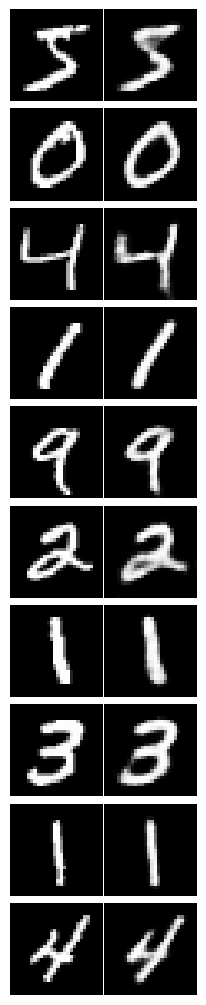

In [121]:
model.eval()

n_images = 10
images = []

for i in range(10):
    x, _ = dataset[i]
    with torch.no_grad():
        image = model(x.unsqueeze(0).to(device))
    images.append((to_image(x), to_image(image.squeeze(0))))
    
plot_image_grid(images, 1)

In [123]:
# Model, loss, and optimizer
latent_dim = 8
model2 = ConvAutoEncoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-2)

In [124]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model2.train()
    epoch_loss = 0
    for images, _ in dataloader:
        images_dev = images.to(device)
        optimizer.zero_grad()
        outputs = model2(images_dev)
        loss = criterion(outputs, images_dev)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Save the model
torch.save(model2.state_dict(), 'models/conv_autoencoder_8.pth')


Epoch [1/10], Loss: 0.0357
Epoch [2/10], Loss: 0.0232
Epoch [3/10], Loss: 0.0219
Epoch [4/10], Loss: 0.0212
Epoch [5/10], Loss: 0.0207
Epoch [6/10], Loss: 0.0203
Epoch [7/10], Loss: 0.0201
Epoch [8/10], Loss: 0.0198
Epoch [9/10], Loss: 0.0196
Epoch [10/10], Loss: 0.0195


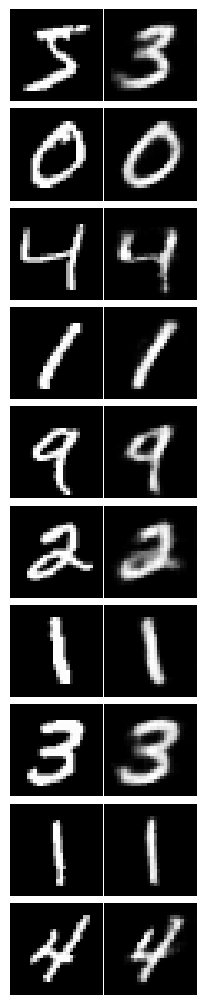

In [125]:
model2.eval()

n_images = 10
images = []

for i in range(10):
    x, _ = dataset[i]
    with torch.no_grad():
        image = model2(x.unsqueeze(0).to(device))
    images.append((to_image(x), to_image(image.squeeze(0))))
    
plot_image_grid(images, 1)

In [126]:
# Model, loss, and optimizer
latent_dim = 2
model3 = ConvAutoEncoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=1e-2)

In [ ]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model3.train()
    epoch_loss = 0
    for images, _ in dataloader:
        images_dev = images.to(device)
        optimizer.zero_grad()
        outputs = model3(images_dev)
        loss = criterion(outputs, images_dev)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Save the model
torch.save(model3.state_dict(), 'models/conv_autoencoder_2.pth')


Epoch [1/10], Loss: 0.0556
Epoch [2/10], Loss: 0.0490
Epoch [3/10], Loss: 0.0480
Epoch [4/10], Loss: 0.0474
Epoch [5/10], Loss: 0.0468
Epoch [6/10], Loss: 0.0462
Epoch [7/10], Loss: 0.0460
Epoch [8/10], Loss: 0.0458
Epoch [9/10], Loss: 0.0456
Epoch [10/10], Loss: 0.0455


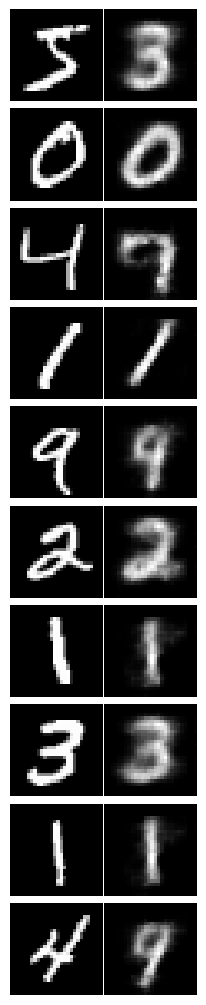

In [128]:
model3.eval()

n_images = 10
images = []

for i in range(10):
    x, _ = dataset[i]
    with torch.no_grad():
        image = model3(x.unsqueeze(0).to(device))
    images.append((to_image(x), to_image(image.squeeze(0))))
    
plot_image_grid(images, 1)

# Applications of autoencoders
- Pack information ... seen!

## Noise removal

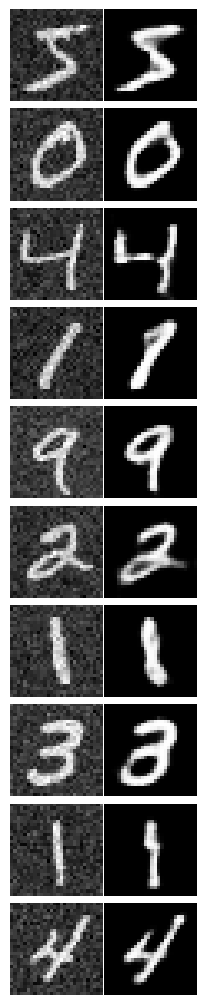

In [133]:
# small noise

model.eval()

n_images = 10
images = []

for i in range(10):
    x, _ = dataset[i]
    noise = torch.randn_like(x) * 0.1
    x = x + noise
    with torch.no_grad():
        image = model(x.unsqueeze(0).to(device))
    images.append((to_image(x), to_image(image.squeeze(0))))
    
plot_image_grid(images, 1)

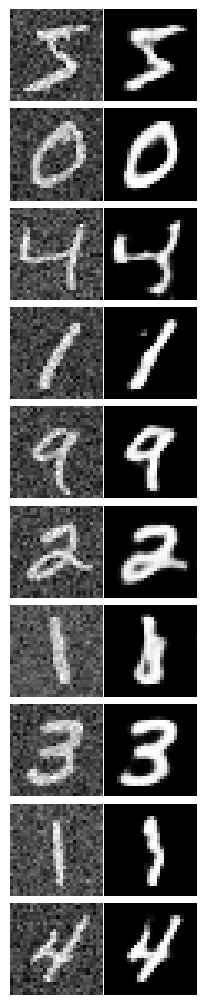

In [136]:
# medium noise

model.eval()

n_images = 10
images = []

for i in range(10):
    x, _ = dataset[i]
    noise = torch.randn_like(x) * 0.15
    x = x + noise
    with torch.no_grad():
        image = model(x.unsqueeze(0).to(device))
    images.append((to_image(x), to_image(image.squeeze(0))))
    
plot_image_grid(images, 1)

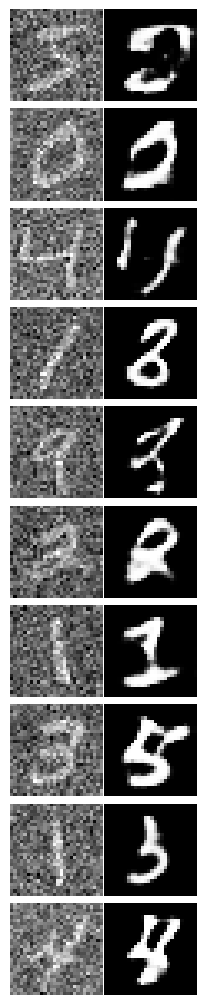

In [137]:
# Large noise

model.eval()

n_images = 10
images = []

for i in range(10):
    x, _ = dataset[i]
    noise = torch.randn_like(x) * 0.4
    x = x + noise
    with torch.no_grad():
        image = model(x.unsqueeze(0).to(device))
    images.append((to_image(x), to_image(image.squeeze(0))))
    
plot_image_grid(images, 1)

## Image classification

In [140]:
model.eval()

n_images = 10
for i in range(10):
    x, _ = dataset[i]
    with torch.no_grad():
        image = model(x.unsqueeze(0).to(device))
    loss = criterion(image.squeeze(0), x.to(device))
    print(loss)


tensor(0.0143, device='cuda:0')
tensor(0.0093, device='cuda:0')
tensor(0.0140, device='cuda:0')
tensor(0.0025, device='cuda:0')
tensor(0.0084, device='cuda:0')
tensor(0.0146, device='cuda:0')
tensor(0.0039, device='cuda:0')
tensor(0.0085, device='cuda:0')
tensor(0.0017, device='cuda:0')
tensor(0.0113, device='cuda:0')


Loss: 0.0395834818482399


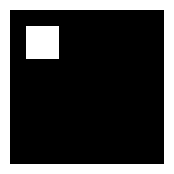

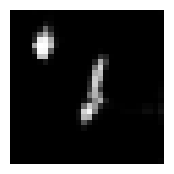

In [146]:
model.eval()
other_img = np.zeros((28, 28), dtype=np.uint8)
other_img[3:9, 3:9] = 255
with torch.no_grad():
    q = transform(other_img).to(device)
    image = model(q.unsqueeze(0))
print("Loss:", criterion(image.squeeze(0), q).item())
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(other_img, cmap='gray')
plt.show()

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(image.squeeze().cpu(), cmap='gray')
plt.show()

Loss: 0.007908172905445099


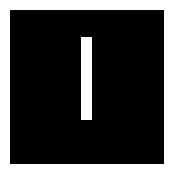

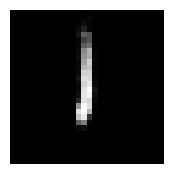

In [147]:
other_img = np.zeros((28, 28), dtype=np.uint8)
other_img[5:20, 13:15] = 255
with torch.no_grad():
    q = transform(other_img).to(device)
    image = model(q.unsqueeze(0))
print("Loss:", criterion(image.squeeze(0), q).item())
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(other_img, cmap='gray')
plt.show()

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(image.squeeze().cpu(), cmap='gray')
plt.show()

Loss: 0.051569391041994095


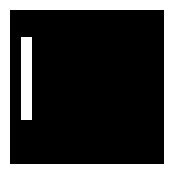

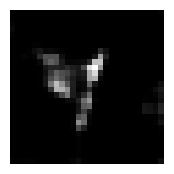

In [148]:
other_img = np.zeros((28, 28), dtype=np.uint8)
other_img[5:20, 2:4] = 255
with torch.no_grad():
    q = transform(other_img).to(device)
    image = model(q.unsqueeze(0))
print("Loss:", criterion(image.squeeze(0), q).item())

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(other_img, cmap='gray')
plt.show()

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(image.squeeze().cpu(), cmap='gray')
plt.show()